# 📚 Student Performance & Cognitive Skills Analysis
# Author: Jayanth Raj G
# Description:
# This notebook performs comprehensive analysis on the students.csv dataset.
# It includes EDA, visualizations, correlation analysis, and insights
# for future ML tasks such as prediction and clustering.


In [5]:
!pip install seaborn faker --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [6]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [7]:
# Display options for large DataFrames
pd.set_option("display.max_columns", None)

# load dataset

In [8]:
df = pd.read_csv("student_performance.csv")

In [9]:
# Quick preview
display(df.head())

,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time
0,S0001,Mason Adams,2,73.86,80.15,87.15,73.09,77.43,99
1,S0002,Thomas Hood,1,73.92,82.01,73.97,73.95,77.17,58
2,S0003,Matthew Diaz,5,48.25,44.65,55.26,45.49,41.49,64
3,S0004,Laura Carpenter,4,68.28,56.34,63.39,68.63,58.39,63
4,S0005,Justin Mccoy,4,61.66,59.18,78.81,63.89,60.48,77


In [10]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1000, 9)


In [11]:
print("\nMissing values:\n", df.isna().sum())


Missing values:
 student_id          0
name                0
class               0
comprehension       0
attention           0
focus               0
retention           0
assessment_score    0
engagement_time     0
dtype: int64


In [12]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   class             1000 non-null   int64  
 3   comprehension     1000 non-null   float64
 4   attention         1000 non-null   float64
 5   focus             1000 non-null   float64
 6   retention         1000 non-null   float64
 7   assessment_score  1000 non-null   float64
 8   engagement_time   1000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [13]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,class,comprehension,attention,focus,retention,assessment_score,engagement_time
count,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,5.51400,69.760100,70.10136,69.66426,69.373460,69.964190,69.499000
std,2.84357,13.150243,12.55095,12.69890,12.717284,11.622732,15.033563
min,1.00000,30.000000,30.00000,30.00000,31.250000,40.000000,20.000000
25%,3.00000,60.647500,62.04500,61.06000,60.617500,62.125000,59.000000
50%,5.00000,69.695000,69.71000,70.24000,69.465000,70.070000,69.000000
75%,8.00000,78.595000,78.90000,77.90750,77.800000,77.977500,80.000000
max,10.00000,100.000000,100.00000,100.00000,100.000000,100.000000,117.000000


In [14]:
# Check unique classes and names
print("\nUnique Classes:", df["class"].unique())
print("Number of unique students:", df["student_id"].nunique())


Unique Classes: [ 2  1  5  4  3  9 10  7  8  6]
Number of unique students: 1000


# plotting distributions

/tmp/ipython-input-2317920408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="viridis")


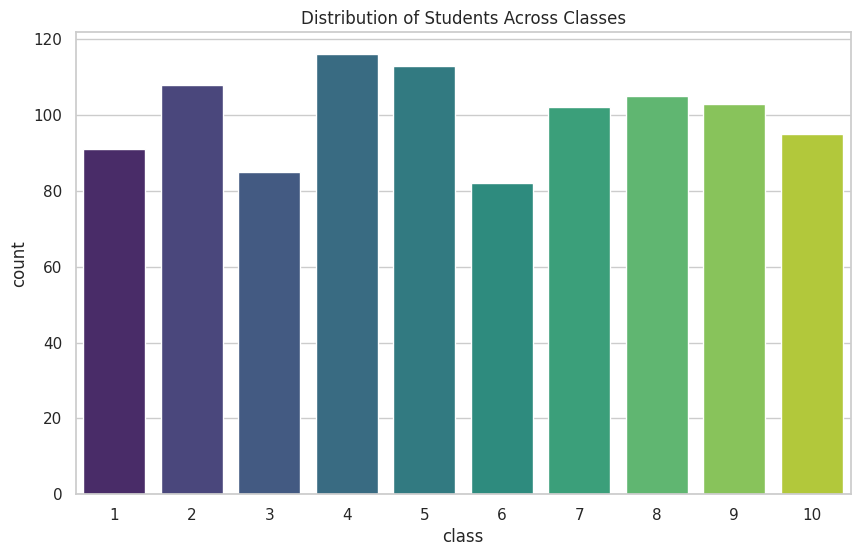

,0
comprehension,69.76010
attention,70.10136
focus,69.66426
retention,69.37346


In [16]:
# --- 📊 Class distribution ---
plt.figure()
sns.countplot(x="class", data=df, palette="viridis")
plt.title("Distribution of Students Across Classes")
plt.show()

# Summary statistics for cognitive skills
df[["comprehension", "attention", "focus", "retention"]].mean()


# correlation analysis

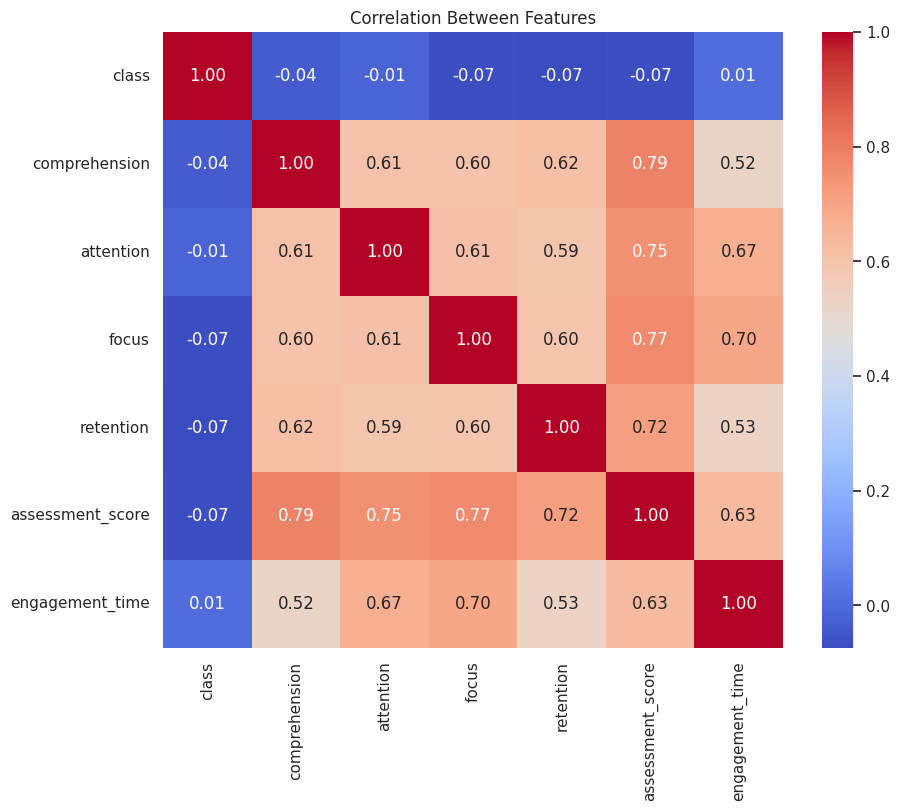

In [18]:
# --- 📈 Correlation Heatmap ---
corr = df.drop(columns=["student_id", "name"]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Between Features")
plt.show()

In [19]:
# Strongest correlations
corr_pairs = corr.unstack().sort_values(ascending=False)
print("\nTop Correlations:\n", corr_pairs.head(10))


Top Correlations:
 class             class               1.000000
comprehension     comprehension       1.000000
attention         attention           1.000000
retention         retention           1.000000
focus             focus               1.000000
assessment_score  assessment_score    1.000000
engagement_time   engagement_time     1.000000
comprehension     assessment_score    0.789825
assessment_score  comprehension       0.789825
                  focus               0.767988
dtype: float64


#Scatter Plots: Attention vs Performance

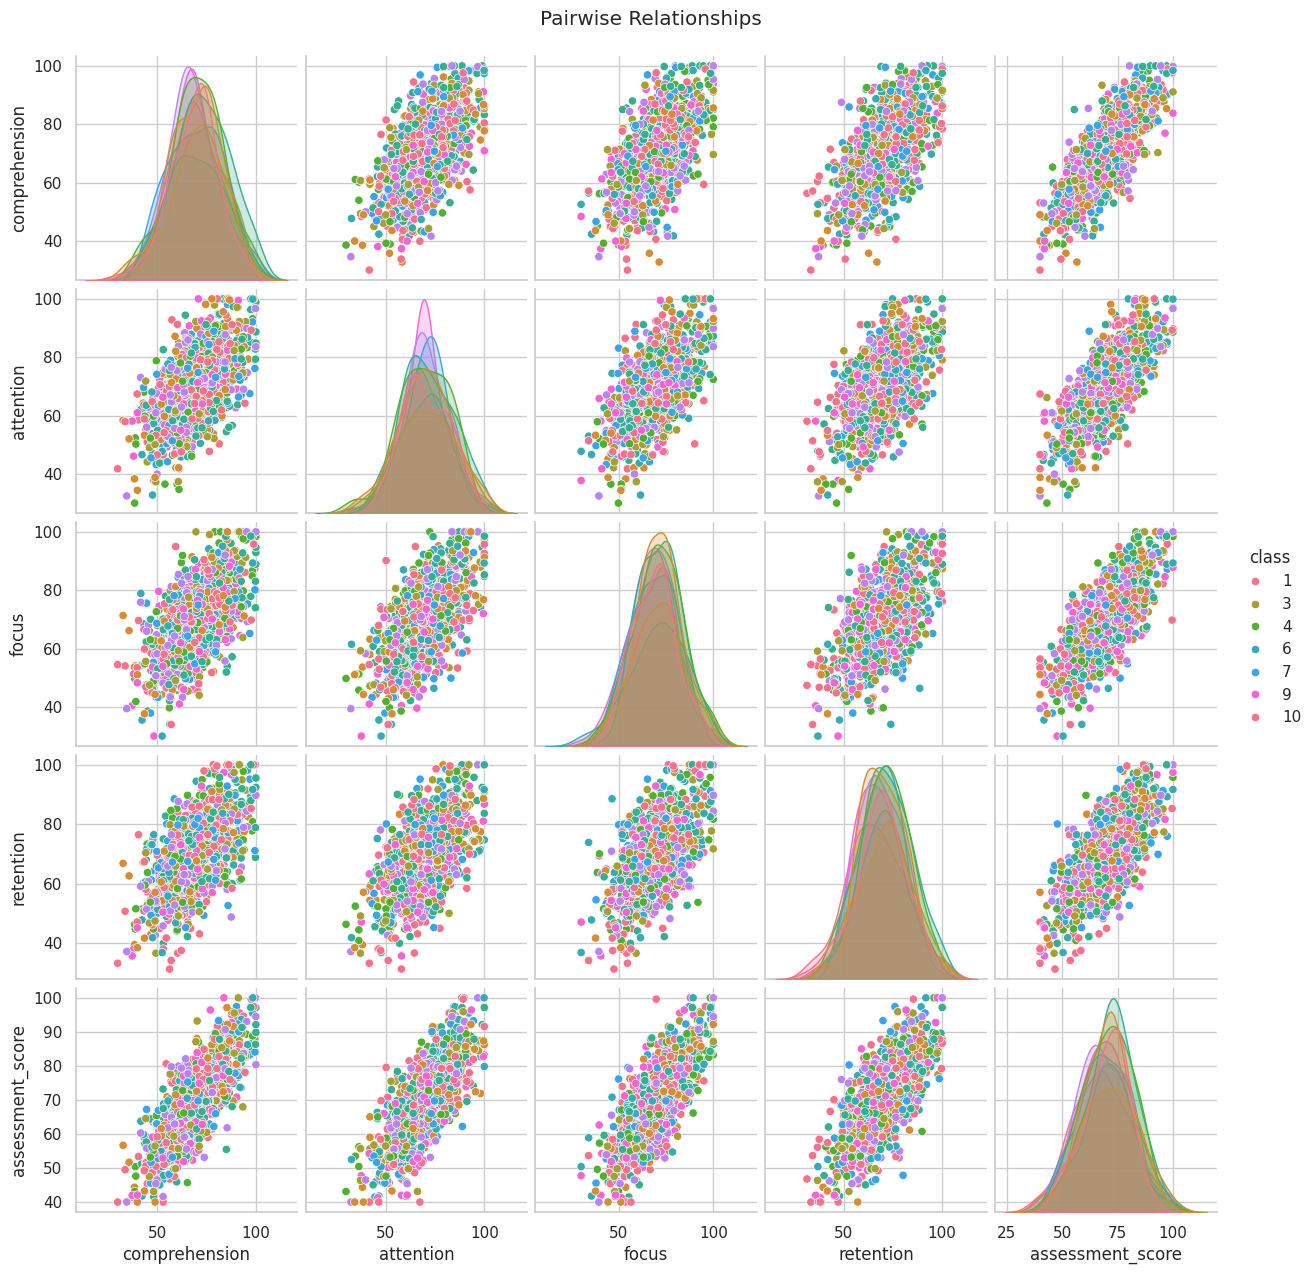

In [20]:
# --- 🧩 Scatter plots ---
sns.pairplot(
    df,
    vars=["comprehension","attention","focus","retention","assessment_score"],
    hue="class", palette="husl"
)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Bar Chart: Average Skills by Class

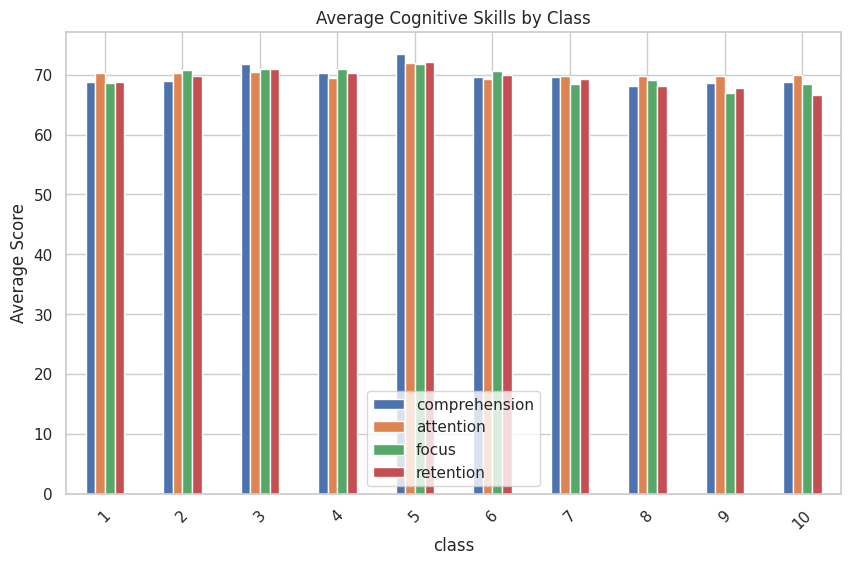

In [26]:
avg_skills = df.groupby("class")[["comprehension", "attention", "focus", "retention"]].mean()
avg_skills.plot(kind="bar", figsize=(10,6))
plt.title("Average Cognitive Skills by Class")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

#Radar Chart for a Single Student Profile

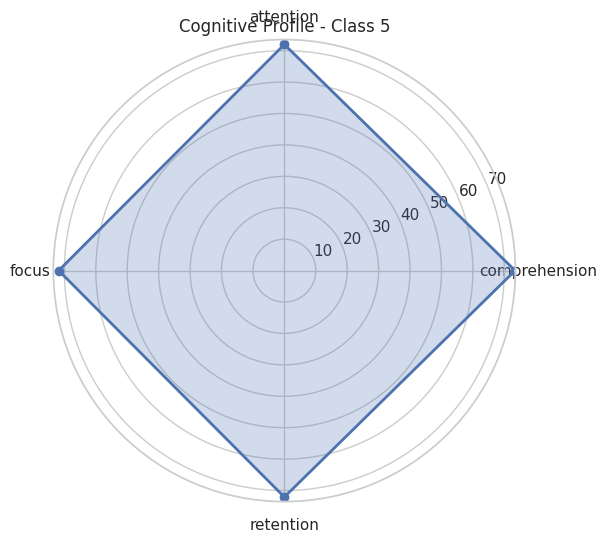

In [21]:
# --- 🛑 Radar chart for a sample class ---
def plot_radar(class_id):
    features = ["comprehension","attention","focus","retention"]
    class_means = df[df["class"]==class_id][features].mean().values

    # Radar chart setup
    angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
    class_means = np.concatenate((class_means, [class_means[0]]))
    angles += angles[:1]

    plt.figure(figsize=(6,6))
    plt.polar(angles, class_means, 'o-', linewidth=2)
    plt.fill(angles, class_means, alpha=0.25)
    plt.xticks(angles[:-1], features)
    plt.title(f"Cognitive Profile - Class {class_id}")
    plt.show()

# Example: Plot for Class 5
plot_radar(5)


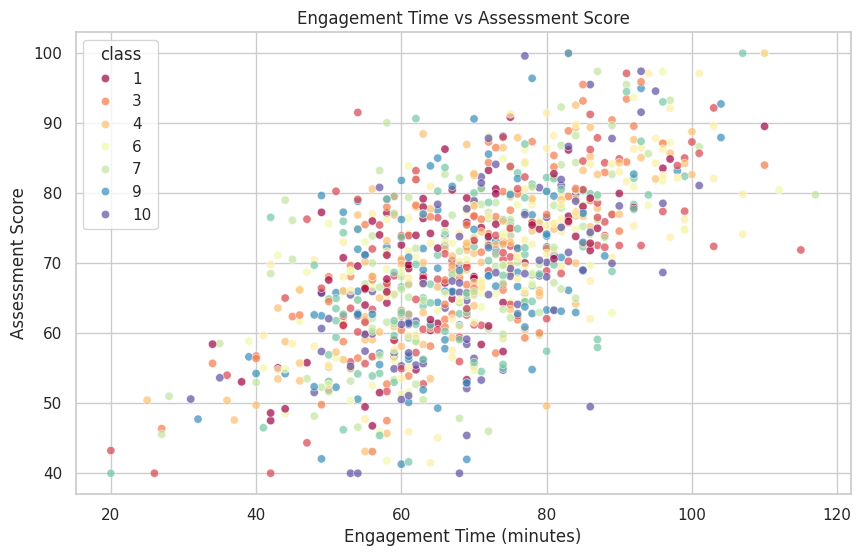

In [23]:
# --- 📊 Engagement vs Performance ---
plt.figure()
sns.scatterplot(
    x="engagement_time", y="assessment_score",
    hue="class", data=df, palette="Spectral", alpha=0.7
)
plt.title("Engagement Time vs Assessment Score")
plt.xlabel("Engagement Time (minutes)")
plt.ylabel("Assessment Score")
plt.show()


#Statistical Insights


In [24]:
# --- 📚 Statistical Tests ---
from scipy.stats import pearsonr

# Example: Correlation between attention and assessment_score
corr_val, p_val = pearsonr(df["attention"], df["assessment_score"])
print(f"Pearson Correlation (attention vs assessment_score): {corr_val:.2f}, p-value={p_val:.4f}")

# Group-level averages by class
class_means = df.groupby("class")[["assessment_score","engagement_time"]].mean()
print("\nAverage Scores and Engagement by Class:\n", class_means)


Pearson Correlation (attention vs assessment_score): 0.75, p-value=0.0000

Average Scores and Engagement by Class:
        assessment_score  engagement_time
class                                   
1             69.838132        66.406593
2             70.061204        70.157407
3             71.650118        69.294118
4             70.664569        69.543103
5             72.089735        73.389381
6             70.417683        69.987805
7             69.723725        68.147059
8             68.594857        69.123810
9             68.525825        67.922330
10            68.022421        70.368421


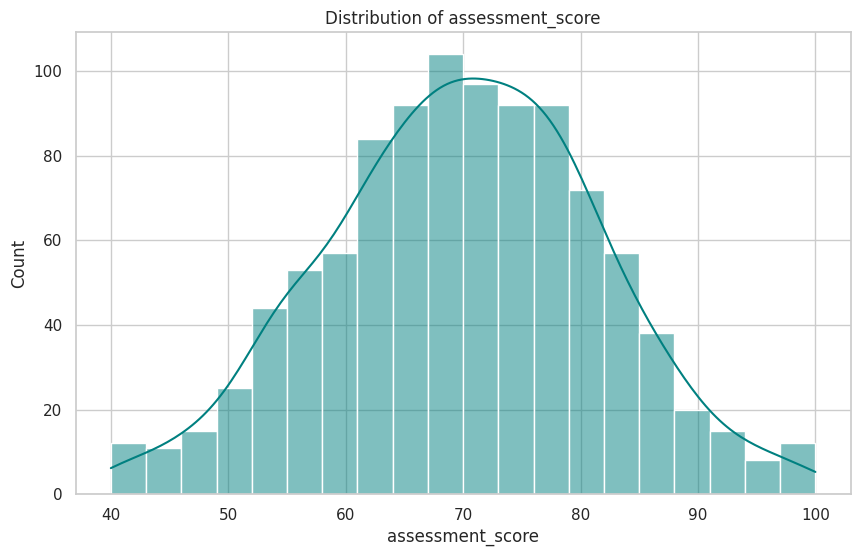

In [25]:
# --- ♻ Modular functions ---
def plot_feature_distribution(df, feature):
    plt.figure()
    sns.histplot(df[feature], kde=True, color='teal', bins=20)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Example usage:
plot_feature_distribution(df, "assessment_score")


#save cleaned data

## pair plot



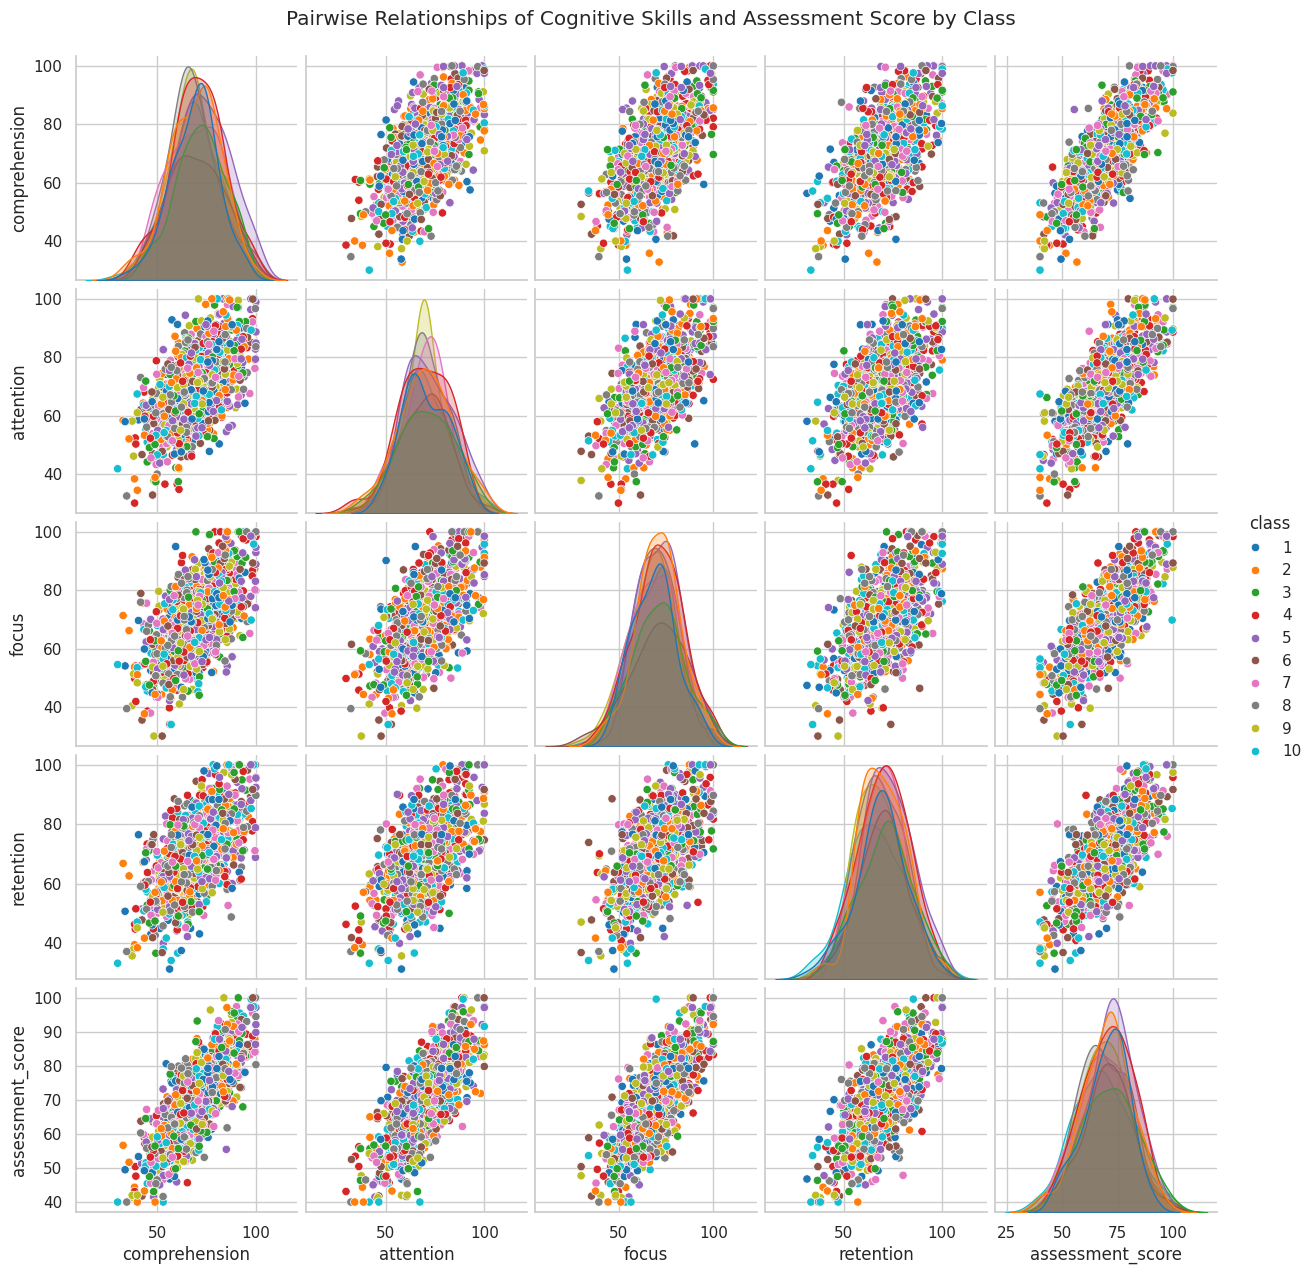

In [27]:
sns.pairplot(
    df,
    vars=["comprehension", "attention", "focus", "retention", "assessment_score"],
    hue="class",
    palette="tab10",
    diag_kind="kde",
    height=2.5
)
plt.suptitle("Pairwise Relationships of Cognitive Skills and Assessment Score by Class", y=1.02)
plt.show()

In [28]:
df.to_csv("students_cleaned.csv", index=False)
print("\nCleaned dataset saved as students_cleaned.csv")


Cleaned dataset saved as students_cleaned.csv


In [33]:
df.duplicated().sum()

np.int64(0)